Importing the neccessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore

Loading the dataset

In [ ]:
df = pd.read_csv("/content/Titanic-Dataset.csv")
print(df)

     Unnamed: 0  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
..          ...       ...     ...   
886         887         0       2   
887         888         1       1   
888         889         0       3   
889         890         1       1   
890         891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
88

Displaying the first five rows in the dataset

In [ ]:
df.head()

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Displaying the last five rows in the dataset

In [ ]:
df.tail()

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Checking whether the dataset has null values

In [ ]:
df.isnull()

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Displaying the sum of null values

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Displaying the information of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  891 non-null    int64  
 1   Survived    891 non-null    int64  
 2   Pclass      891 non-null    int64  
 3   Name        891 non-null    object 
 4   Sex         891 non-null    object 
 5   Age         714 non-null    float64
 6   SibSp       891 non-null    int64  
 7   Parch       891 non-null    int64  
 8   Ticket      891 non-null    object 
 9   Fare        891 non-null    float64
 10  Cabin       204 non-null    object 
 11  Embarked    889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Describing the dataset

In [ ]:
df.describe()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Displaying the sum of duplicated values

In [ ]:
df.duplicated().sum()

0

Displaying the sum of null values in the "Age" column

In [ ]:
df['Age'].isnull().sum()

177

Displaying the sum of null values in the "Cabin" column

In [ ]:
df['Cabin'].isnull().sum()

687

Displaying the sum of null values in the "Embarked" column

In [ ]:
df['Embarked'].isnull().sum()

2

In [ ]:
df=df.drop('Cabin',axis=1)

In [ ]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df['Age'] = df['Age'].interpolate(method='linear')

Calculating the IQR

In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

Q1 (25th percentile): 21.0
Q3 (75th percentile): 38.0
IQR: 17.0


In [ ]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [ ]:
print(f"Lower Limit: {lower_limit}")
print(f"Upper Limit: {upper_limit}")

Lower Limit: -4.5
Upper Limit: 63.5


In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
df_cleaned = df[num_cols].dropna()

Standardizing the data

In [ ]:
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=num_cols)

Normalizing the data

In [ ]:
min_max_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df_cleaned), columns=num_cols)
print(df_normalized)

     Unnamed: 0  Survived  Pclass       Age  SibSp     Parch      Fare
0      0.000000       0.0     1.0  0.271174  0.125  0.000000  0.014151
1      0.001124       1.0     0.0  0.472229  0.125  0.000000  0.139136
2      0.002247       1.0     1.0  0.321438  0.000  0.000000  0.015469
3      0.003371       1.0     0.0  0.434531  0.125  0.000000  0.103644
4      0.004494       0.0     1.0  0.434531  0.000  0.000000  0.015713
..          ...       ...     ...       ...    ...       ...       ...
886    0.995506       0.0     0.5  0.334004  0.000  0.000000  0.025374
887    0.996629       1.0     0.0  0.233476  0.000  0.000000  0.058556
888    0.997753       0.0     1.0  0.277457  0.125  0.333333  0.045771
889    0.998876       1.0     0.0  0.321438  0.000  0.000000  0.058556
890    1.000000       0.0     1.0  0.396833  0.000  0.000000  0.015127

[891 rows x 7 columns]


In [ ]:
df_zscore = df_cleaned.apply(zscore)
print(df_zscore)

     Unnamed: 0  Survived    Pclass       Age     SibSp     Parch      Fare
0     -1.730108 -0.789272  0.827377 -0.556050  0.432793 -0.473674 -0.502445
1     -1.726220  1.266990 -1.566107  0.595481  0.432793 -0.473674  0.786845
2     -1.722332  1.266990  0.827377 -0.268167 -0.474545 -0.473674 -0.488854
3     -1.718444  1.266990 -1.566107  0.379569  0.432793 -0.473674  0.420730
4     -1.714556 -0.789272  0.827377  0.379569 -0.474545 -0.473674 -0.486337
..          ...       ...       ...       ...       ...       ...       ...
886    1.714556 -0.789272 -0.369365 -0.196196 -0.474545 -0.473674 -0.386671
887    1.718444  1.266990 -1.566107 -0.771962 -0.474545 -0.473674 -0.044381
888    1.722332 -0.789272  0.827377 -0.520064  0.432793  2.008933 -0.176263
889    1.726220  1.266990 -1.566107 -0.268167 -0.474545 -0.473674 -0.044381
890    1.730108 -0.789272  0.827377  0.163657 -0.474545 -0.473674 -0.492378

[891 rows x 7 columns]


Plotting the graph

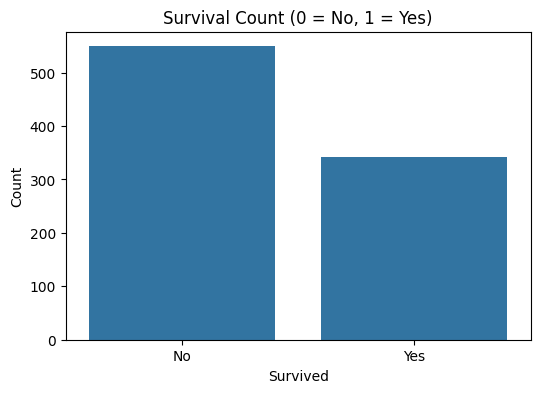

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

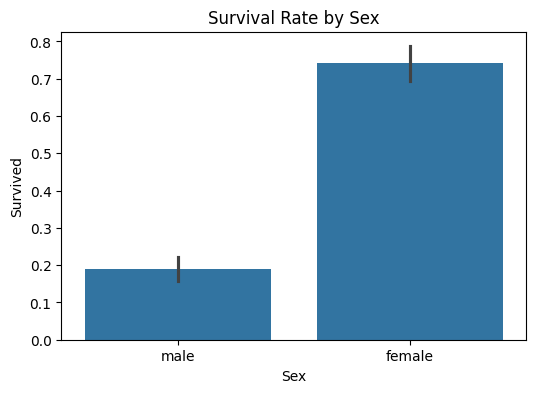

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

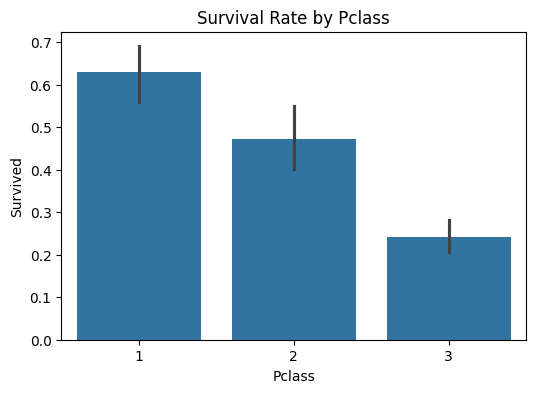

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()

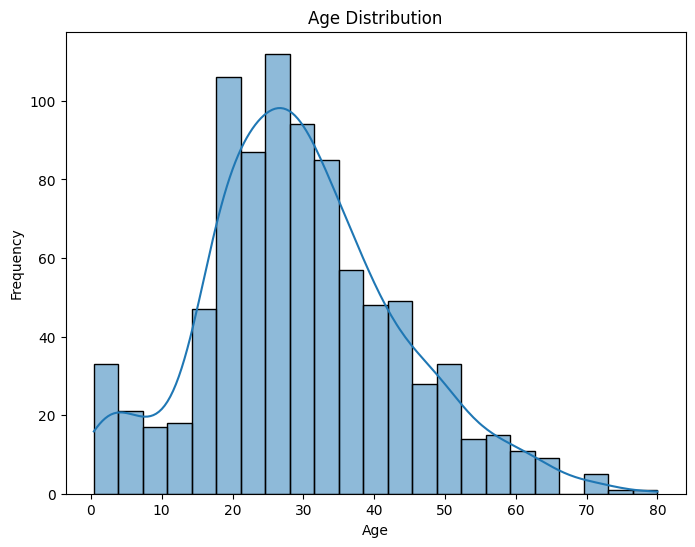

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

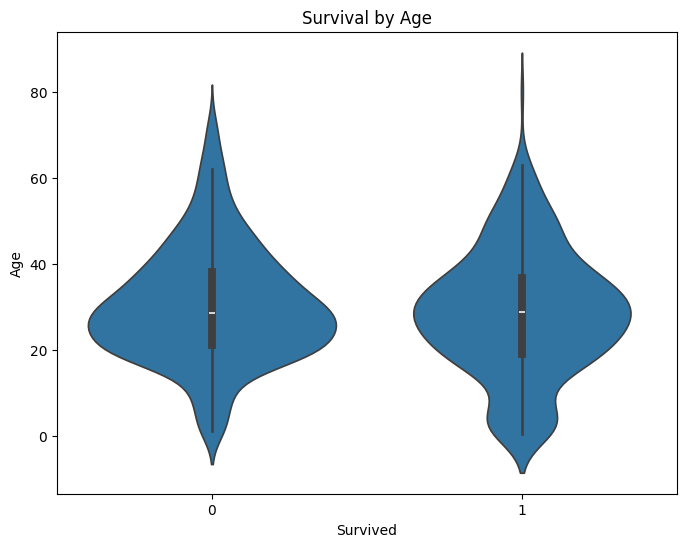

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Survival by Age')
plt.show()

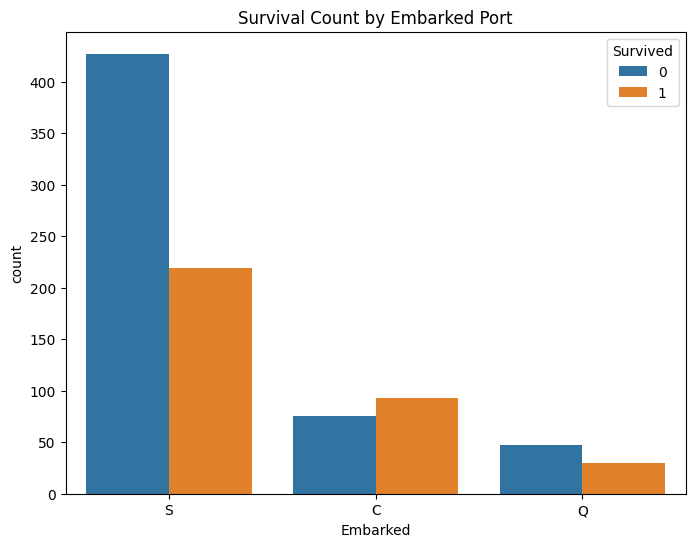

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked Port')
plt.show()

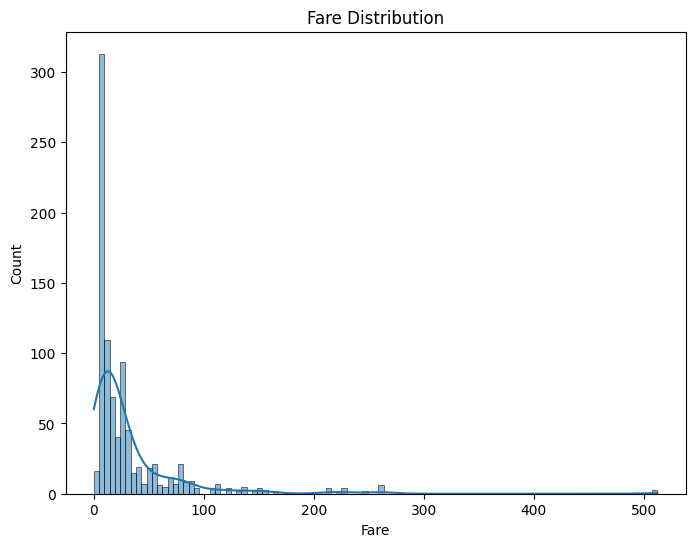

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

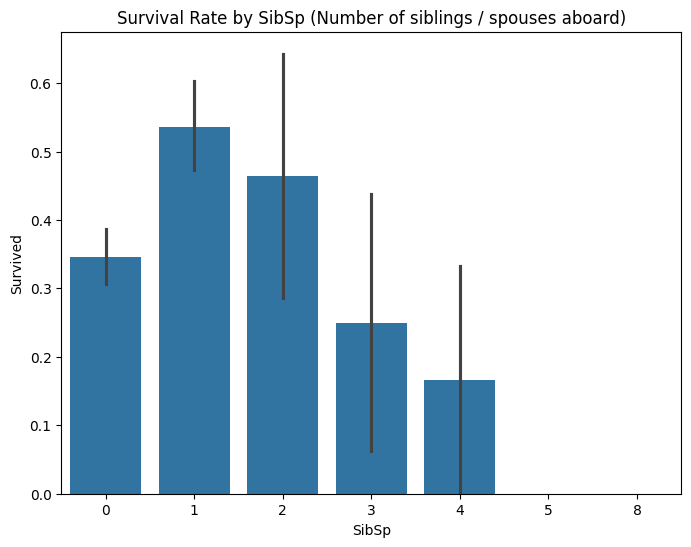

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survival Rate by SibSp (Number of siblings / spouses aboard)')
plt.show()

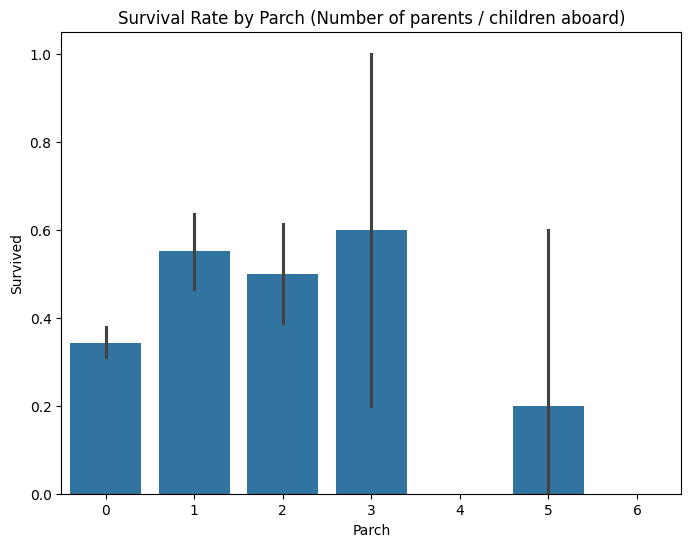

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Survival Rate by Parch (Number of parents / children aboard)')
plt.show()